# Exploring your working directory

Antes de comenzar a exportar ficheros en Python debemos tener una idea de que ficheros tenemos disponibles en nuestro espacio de trabajo. Para esto disponemos del comando **!ls**.

In [3]:
#Vemos los ficheros que disponemos en nuestro espacio de trabajo
!ls

battledeath.xlsx		   mnist_kaggle_some_rows.csv
Chinook.sqlite			   moby_dick.txt
disarea.dta			   sales.sas7bdat
Introduction and flat files.ipynb  seaslug.txt
ja_data2.mat			   titanic_sub.csv
L-L1_LOSC_4_V1-1126259446-32.hdf5


# Importing entire text files

A continuación vamos a proceder a trabajar con el fichero **moby_dick.txt**. Se trata de un fichero de texto plano que contiene un trozo de la novela moby dick. A continuación vamos a proceder a mostrar el contenido de este fichero.

In [4]:
#Abrimos el fichero
file = open("moby_dick.txt", mode = "r")

#Mostramos el contenido 
print(file.read())

CHAPTER 1. Loomings.
    
Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. I

In [10]:
#Chequeamos si el fichero fue cerrado en caso de que no sea así procedemos a cerrar
if not(file.closed):
    file.close()

In [11]:
#Chequeamos si el fichero fue cerrado
file.closed

True

# Importing text files line by line 

Cuando estamos trabajando con ficheros de texto muy muy grandes es posible que no estemos interesados en mostrar el fichero por completo. Si estamos interesados solamente en mostrar las primeras líneas de nuestro fichero de texto, podemos hacer uso del método **readline()**. Cada vez que ejecutamos este método, una nueva línea de nuestro fichero es mostrada. Haciendo uso del construct manager **with** podemos asociar directamente a una variable la lectura del fichero.

In [13]:
#Hacemos uso del construct manager with para abrir y leer las tres primeras líneas de nuestro fichero
with open("moby_dick.txt") as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.

    

Call me Ishmael. Some years ago--never mind how long precisely--having



# Using Numpy to import flat files

Cuado estamos trabajando con datos en los cuales todos sus valores se tratan de valores numéricos, es posible que la mejor opción para importar estos datos sea en un array. Para esto el paquete Numpy dispone de la función **loadtxt()** donde tenemos que:

* El primer argumento es el path en donde se encuentra el fichero que deseamos cargar.

* El segundo argumento es el delimitador de nuestro fichero.

A continuación vamos a importar el conjunto de MNIST que únicamente contiene valores numéricos. Este conjunto de datos contiene valores asociados a píxeles de diferentes números del 0 al 9.

In [1]:
#Importamos numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt
#Cargamos el path del fichero
path_file = "mnist_kaggle_some_rows.csv"

#Cargamos los datos en un array
digits = np.loadtxt(path_file, delimiter = ",")

#Mostramos el tipo de datos de digits
print(type(digits))

<class 'numpy.ndarray'>


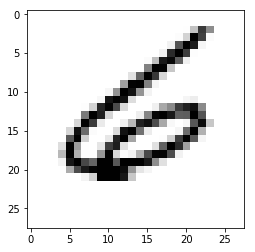

In [19]:
#Seleccionamos la fila 21 y todas las columnas a partir de la segunda
row = digits[21, 1:]
#Hacemos un reescalado
row_reshape = np.reshape(row, (28, 28))
#Mostramos por pantalla el resultado 
plt.imshow(row_reshape, cmap = "Greys", interpolation = "nearest")
plt.show()

# Customizing your Numpy import 

Puede que tengamos filas tales como cabeceras que no queramos importar. Además es posible que nuestro fichero esté delimitado por algún que otro delimitador que no sea la comma. Existen una serie de argumentos que nos proporciona la función **np.loadtxt()** que en determinados momentos pueden ser realmente útiles. Estos argumentos son:

* **delimiter:** indicamos el tipo de delimitador de nuestro fichero (tabulador: \t, coma:, etc).

* **usecols:** mediante una lista indicamos el índice de las columnas que queremos importar.

* **skiprows:** indicamos los índices de las filas que no deseamos cargar.

# Importing different data types

A continuación vamos a proceder a hacer uso del fichero **seaslug.txt** que contiene texto como cabeceras y además se encuentra separado por tabulador. Este conjunto de datos contiene información del porcentaje de babosas marinas que se metarfosean en un tiempo determinado. Si tratamos de importar este tipo de datos haciendo uso de la función **loadtxt()**, Python nos dará un error indicando que no puede pasar strings a tipo float, existen dos formas de cargar este fichero:

* Saltándonos la fila que corresponde a la cabecera haciendo uso del parámetro skiprows

* Haciendo uso del argumento dtype e indicando que el tipo de datos a importar son strings, pero en este caso todos los datos serán importados como strings.

In [23]:
#Cargamos los datos haciendo uso de skiprows
seaslug_skiprows = np.loadtxt("seaslug.txt", delimiter = "\t", skiprows = 1)
#Mostramos una muestra de los datos
print(seaslug_skiprows[0:2,:])

[[  9.90000000e+01   6.70000000e-02]
 [  9.90000000e+01   1.33000000e-01]]


In [24]:
#Cargamos los datos haciendo uso del parámetro dtype = "str"
seaslug_dtype = np.loadtxt("seaslug.txt", delimiter = "\t", dtype = "str")
#Mostramos una muestra de los datos
print(seaslug_dtype[0:2, :])

[['Time' 'Percent']
 ['99' '0.067']]


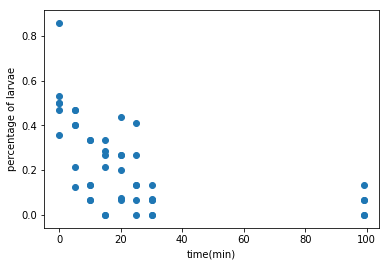

In [25]:
#Procedemos a mostrar los datos en un scatter plot
plt.scatter(seaslug_skiprows[:,0], seaslug_skiprows[:,1])
plt.xlabel("time(min)")
plt.ylabel("percentage of larvae")
plt.show()

# Working with mixed datatypes (1)

En muchas ocasiones vamos a necesitar importar datos que están compuestos por diferentes tipos de datos, es decir, el tipo de dato que almacena una columna es distinto al tipo de datos que almacenará otra columna. La función **np.loadtxt()** no nos permite hacer esto. Para esto disponemos de la función **np.genfromtxt()** mediante la cual podemos manejar este tipo de estructuras. Si le pasamos el argumento **dtype = None**, inferirá que tipo de dato debe der ser cada columna.

In [8]:
#Cargamos los datos de titanic.csv haciendo uso de la función np.genfromtxt()
titanic = np.genfromtxt("titanic_sub.csv", delimiter = ",", dtype = None, names = True)
titanic[1:5]

array([(2, 1, 1, b'female',  38., 1, 0, b'PC 17599',  71.2833, b'C85', b'C'),
       (3, 1, 3, b'female',  26., 0, 0, b'STON/O2. 3101282',   7.925 , b'', b'S'),
       (4, 1, 1, b'female',  35., 1, 0, b'113803',  53.1   , b'C123', b'S'),
       (5, 0, 3, b'male',  35., 0, 0, b'373450',   8.05  , b'', b'S')],
      dtype=[('PassengerId', '<i8'), ('Survived', '<i8'), ('Pclass', '<i8'), ('Sex', 'S6'), ('Age', '<f8'), ('SibSp', '<i8'), ('Parch', '<i8'), ('Ticket', 'S18'), ('Fare', '<f8'), ('Cabin', 'S15'), ('Embarked', 'S1')])

# Working with mixed datatypes (2)

Además de la función **np.genfromtxt()** para importar datos mixtos en formato array, disponemos de la función **np.recfromcsv()** esta función realizar un función similar a la función **np.genfromtxt()** con al diferencia que por defecto el valor del argument **dtype = None**, el argumento **delimiter = ","** y el argumento **names = True**, lo que hace que la llamada sea más simple.

In [9]:
titanic_2 = np.recfromcsv("titanic_sub.csv")
titanic_2[1:5]

rec.array([(2, 1, 1, b'female',  38., 1, 0, b'PC 17599',  71.2833, b'C85', b'C'),
           (3, 1, 3, b'female',  26., 0, 0, b'STON/O2. 3101282',   7.925 , b'', b'S'),
           (4, 1, 1, b'female',  35., 1, 0, b'113803',  53.1   , b'C123', b'S'),
           (5, 0, 3, b'male',  35., 0, 0, b'373450',   8.05  , b'', b'S')], 
          dtype=[('passengerid', '<i8'), ('survived', '<i8'), ('pclass', '<i8'), ('sex', 'S6'), ('age', '<f8'), ('sibsp', '<i8'), ('parch', '<i8'), ('ticket', 'S18'), ('fare', '<f8'), ('cabin', 'S15'), ('embarked', 'S1')])

# Using pandas to import flat files as DataFrames (1)

En el ejercicio anterior aprendimos a hacer uso de Numpy para importar datos, donde cada columna era de un tipo diferente. Sin embargo, el objeto pandas **Dataframe** es mucho más apropiados para almacenar este tipo de datos. Para ello la librería **pandas** nos aporta funciones como **read_csv** y **read_table**.

In [1]:
#Importamos la librería
import pandas as pd

#Hacemos la lectura de los datos
df = pd.read_csv("titanic_sub.csv")

#Mostramos las 6 primeras observaciones
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


# Using pandas to import flat files as DataFrames (2)

Un **Dataframe** dispone del atributo **values** que nos permite pasar un **Dataframe** a Numpy array. Además el argumento **header** de la función **read_csv** nos permite indicar si vamos a cargar el conjunto de datos con cabecera o sin cabecera. El parámetro **nrows** nos permite indicar el número de filas que deseamos importar.

In [3]:
#Cargamos los datos
data = pd.read_csv("mnist_kaggle_some_rows.csv", header = None, nrows = 5)

#Procedemos a extraer de los datos un Numpy Array
np_data = data.values

#Mostramos el tipo de dato que es np_data
print(type(np_data))

<class 'numpy.ndarray'>


Además pandas cuenta con dos argumentos que pueden ser muy interesantes a la hora de cargar los datos:
    
* **na_values**: en este argumento indicamos que valores queremos que tome como NaN, es posible que tengamos ciertos valores que tomen el valor Nothing y queramos cambiar esto por NaN, para esto podemos darle el valor de Nothing a esta variable.

* **comment**: toma el valor de un str, por ejemplo si comment toma el valor '#', esto nos indica que todo lo que venga a continuación de '#' no es importado.